<a href="https://colab.research.google.com/github/marianamelodev/alura-store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [18]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

lojas = {
    'Loja 1': loja,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [19]:
for nome, df in lojas.items():
    faturamento = df['Preço'].sum()
    print(f'{nome}: R$ {faturamento:.2f}')

Loja 1: R$ 1534509.12
Loja 2: R$ 1488459.06
Loja 3: R$ 1464025.03
Loja 4: R$ 1384497.58


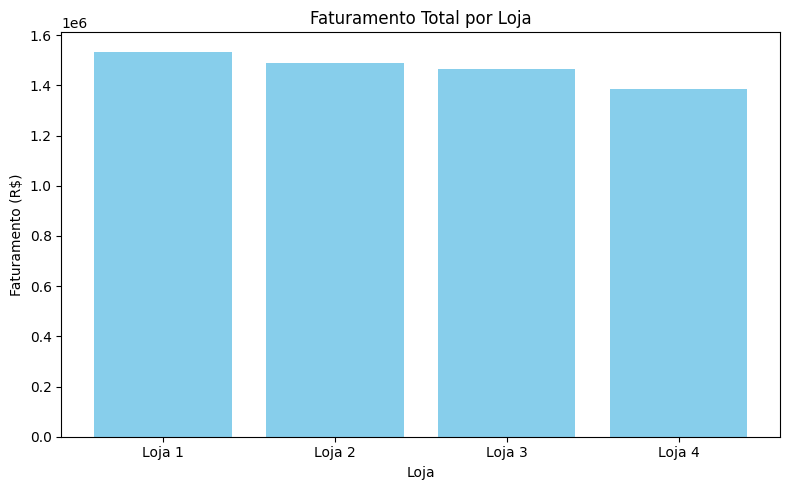

In [21]:
import matplotlib.pyplot as plt

faturamentos = {nome: df['Preço'].sum() for nome, df in lojas.items()}

plt.figure(figsize=(8, 5))
plt.bar(faturamentos.keys(), faturamentos.values(), color='skyblue')
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [22]:
for nome, df in lojas.items():
    print(f"\nCategorias mais vendidas - {nome}")
    print(df['Categoria do Produto'].value_counts())



Categorias mais vendidas - Loja 1
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

Categorias mais vendidas - Loja 2
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

Categorias mais vendidas - Loja 3
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

Categorias mais vendidas - Loja 4
Categoria do Produto
mo

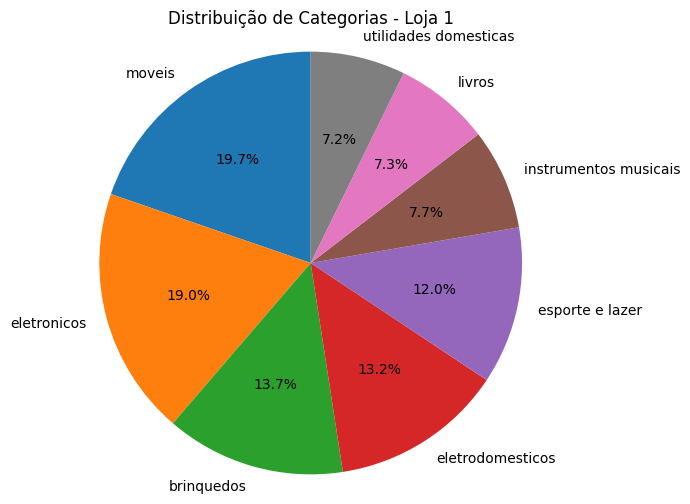

In [23]:
import matplotlib.pyplot as plt

categorias_loja1 = lojas['Loja 1']['Categoria do Produto'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(categorias_loja1, labels=categorias_loja1.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Categorias - Loja 1')
plt.axis('equal')
plt.show()

# 3. Média de Avaliação das Lojas

In [24]:
for nome, df in lojas.items():
    media_avaliacao = df['Avaliação da compra'].mean()
    print(f'{nome}: {media_avaliacao:.2f}')

Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [25]:
for nome, df in lojas.items():
    print(f"\n{nome}")
    mais_vendidos = df['Produto'].value_counts().head(3)
    menos_vendidos = df['Produto'].value_counts().tail(3)
    print("Mais vendidos:\n", mais_vendidos)
    print("Menos vendidos:\n", menos_vendidos)


Loja 1
Mais vendidos:
 Produto
Micro-ondas      60
TV Led UHD 4K    60
Guarda roupas    60
Name: count, dtype: int64
Menos vendidos:
 Produto
Panela de pressão    35
Headset              33
Celular ABXY         33
Name: count, dtype: int64

Loja 2
Mais vendidos:
 Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Name: count, dtype: int64
Menos vendidos:
 Produto
Mesa de jantar       34
Impressora           34
Jogo de tabuleiro    32
Name: count, dtype: int64

Loja 3
Mais vendidos:
 Produto
Kit banquetas     57
Mesa de jantar    56
Cama king         56
Name: count, dtype: int64
Menos vendidos:
 Produto
Mochila             36
Micro-ondas         36
Blocos de montar    35
Name: count, dtype: int64

Loja 4
Mais vendidos:
 Produto
Cama box                   62
Faqueiro                   59
Dashboards com Power BI    56
Name: count, dtype: int64
Menos vendidos:
 Produto
Violão           37
Guarda roupas    34
Guitarra         33
Name: count

# 5. Frete Médio por Loja


In [26]:
for nome, df in lojas.items():
    frete_medio = df['Frete'].mean()
    print(f'{nome}: R$ {frete_medio:.2f}')


Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


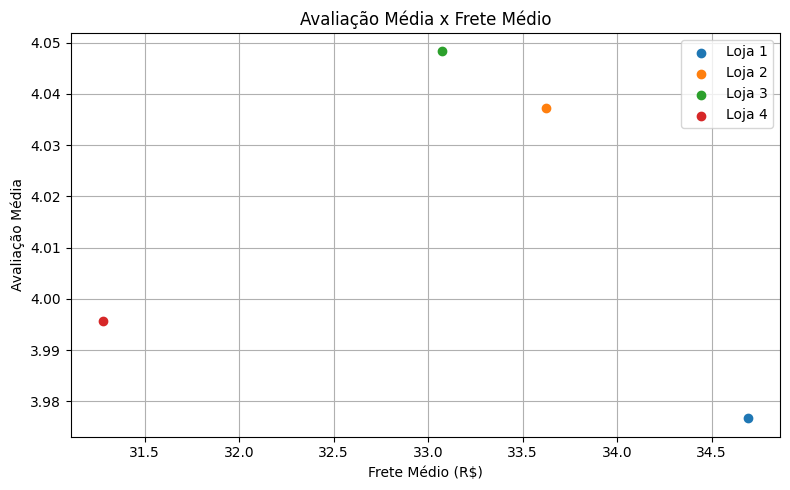

In [27]:
import matplotlib.pyplot as plt

avaliacoes = {nome: df['Avaliação da compra'].mean() for nome, df in lojas.items()}
fretes = {nome: df['Frete'].mean() for nome, df in lojas.items()}

plt.figure(figsize=(8, 5))
for nome in lojas:
    plt.scatter(fretes[nome], avaliacoes[nome], label=nome)

plt.title('Avaliação Média x Frete Médio')
plt.xlabel('Frete Médio (R$)')
plt.ylabel('Avaliação Média')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
for nome, df in lojas.items():
    print(f"Column names for {nome}:")
    print(df.columns)

Column names for Loja 1:
Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')
Column names for Loja 2:
Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')
Column names for Loja 3:
Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')
Column names for Loja 4:
Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
  

In [29]:
for nome, df in lojas.items():
    print(f"Column names for {nome}:")
    print(df.columns)

Column names for Loja 1:
Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')
Column names for Loja 2:
Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')
Column names for Loja 3:
Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')
Column names for Loja 4:
Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
  